# Overview of Python features

This is a "Jupyter Notebook". Formerly an IPython Notebook. It is a good way to document workflows and analysis pipelines. You can have Python, R, Fortran, Julia, etc notebooks. This is a "Markdown" cell, you can write notes, equations in latex style, $E=\kappa A ^m (\nabla z)^n$, or embed figures. 

Today we are using a Python kernel to do some cool stuff with Geoscience data. The following cell is your first Python code

In [1]:
2+4*10

42

In [2]:
#This is a comment. This is for a human to read (so you remember what your code does!)
#Python ignores anything behind the '#'.

#The next line is an example of a 'variable'. Assign values using a single '=' sign.
time=145

In [3]:
#Now you can use that variable in different ways.... firstly print it out to the screen
print("The age of the sample is", time, " Million years")

The age of the sample is 145  Million years


In [4]:
#Make a new variable called 'endtime' and add a constant to our 'time' variable
endtime=time+56

In [5]:
#Nothing printed out above? Good. Jupyter Notebooks won't always do that so let's tell Python to print it.
print(endtime)

201


In [6]:
#Make a new 'string' variable
geological_age='Jurassic'

#Print out some useful information that includes our different variables
print("My sample is ", endtime, " Million years old from the", geological_age, " age.")

My sample is  201  Million years old from the Jurassic  age.


### Lists

In [7]:
#Make a Python List object, similar to an array.
times=[1,4.5,5+3.2,geological_age,"Another string",True]

print(times)

#There are many different types of data types and objects: 
#int, long, float, complex, NaN, logical, String, Lists, Tuple, Dictionary, functions, classes, etc

[1, 4.5, 8.2, 'Jurassic', 'Another string', True]


In [8]:
#indexing
print(times[0])

1


### Functions
These are bits of code you want to perhaps use many times, or keep self contained, or refer to at different points. They can take values as input and give values back (or not). 

In [9]:
#Declare the name of the function
def add_numbers(x,y):
    '''adds two numbers
    usage: myaddition=addnumbers(x,y)
    returns: z
    inputs: x,y
    x and y are two integers
    z is the summation of x and y
    '''
    
    z=x+y
    
    return(z)

Note the indentation - Python forces your code to be nicely readable by using 'whitespace'/indentation to signify what chunks of code are related. You will see this more later.
    
Many functions have a header - formatted as a multiline comment with three '''. This hopefully will tell you about the function

Anyway, let's run our function, now that we have initialised it!

In [10]:
add_numbers(1,2)

3

#### Challenge 

Write a function to convert map scale. For example, on a 1:25,000 map (good for hiking!) the distance between two points is 15 cm. How far apart are these in real life? (3750 m).

[Reminder: 15 cm * 25000 = 375000 cm = 3750 m]

Your function should take as input two numbers:  the distance on the map (in cm) and the second number of the scale and, i.e. `calculate_distance(15, 25000)` should return 375000

In [11]:
## YOUR CODE HERE

### Loops, operators, conditions

Python is great for doing something a million times. It can be useful if you have many samples/datapoints and you want to operate or manipulate those points.

In [12]:
#Loop through our list 'times' that we defined above
for mything in times:
    print(mything)

1
4.5
8.2
Jurassic
Another string
True


Sometimes you need to loop through a list, but simultaneously keep track of which index you're up to.

In [13]:
for myindex, mything in enumerate(times):
    print("index:",myindex," The thing in my 'times' list:",mything)

index: 0  The thing in my 'times' list: 1
index: 1  The thing in my 'times' list: 4.5
index: 2  The thing in my 'times' list: 8.2
index: 3  The thing in my 'times' list: Jurassic
index: 4  The thing in my 'times' list: Another string
index: 5  The thing in my 'times' list: True


### Control statements

In [14]:
#Control statements: if, for, while, try, 

time = 145

if time <= 200:
    print("Jurassic age")
elif time > 200:
    print("Triassic age")
else:
    pass #This option is not necessarily needed, but can be useful in some scenarios

Jurassic age


In [15]:
#Another function
def timescale(t):
    print(t)
    if (t <= 4500) & (t > 2500):
        return("Archean")

    elif (t <=2500) & (t > 541):
        return("Proterozoic")

    elif (t <= 541) & (t > 252):
        return("Palaeozoic")

    elif (t <=252) & (t > 65):
        return("Mesozoic")

    elif (t <=65) & (t >= 0):
        return("Cenozoic")

    else:
        print ("Expect number between 0 and 4500, got:",t)
        return(float('nan'))

In [16]:
timescale(1)

1


'Cenozoic'

## NumPy data structures

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
an_array = np.array([0,1,2,3,4,5,6], dtype=float)

print(an_array)


[0. 1. 2. 3. 4. 5. 6.]


In [19]:
A = np.zeros((4,4))
print (A)
print (A.shape)

A[0,0] = 2.0
print (A)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(4, 4)
[[2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Indexing / broadcasting

In numpy, we can index an array by explicitly specifying elements, by specifying slices, by supplying lists of indices (or arrays), we can also supply a boolean array of the same shape as the original array which will select / return an array of all those entries where `True` applies.

Although some of these might seem difficult to use, they are often the result of other numpy operations. For example `np.where` converts a truth array to a list of indices.

In [20]:
print(A > 0)
print(np.where(A > 0))

B = A * A
B[A == 0] = 1
print(B)

[[ True False False False]
 [False False False False]
 [False False False False]
 [False False False False]]
(array([0]), array([0]))
[[4. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Vector operations

In [21]:
X = np.arange(0, 2*np.pi, np.pi/10)
S = np.sin(X)
C = np.cos(X)
C2 = np.gradient(S, X)

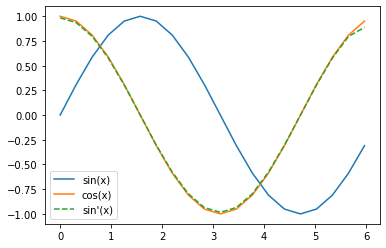

In [22]:
plt.plot(X, S, label='sin(x)')
plt.plot(X, C, label='cos(x)')
plt.plot(X, C2, '--', label="sin'(x)")
plt.legend()

## SciPy

In [23]:
from scipy.interpolate import interp1d

In [24]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y, kind='linear') # default if kind=None
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='nearest')

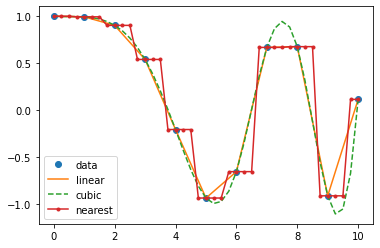

In [25]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-')
plt.legend(['data', 'linear', 'cubic', 'nearest'], loc='best')
plt.show()

## Loading data

In [26]:
filename = 'Data/EarthChemCU.csv'
chemdata = np.loadtxt(filename, delimiter=',')

In [27]:
#What does the data look like. Print it out
print(chemdata)
print(chemdata.shape)

[[ 3.92583e+01 -1.14992e+02  1.11000e+02  1.96000e+04]
 [ 3.92583e+01 -1.14992e+02  1.11000e+02  1.57000e+04]
 [ 4.12060e+01 -1.17272e+02  1.05000e+02  3.00000e+00]
 ...
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.00000e+01]
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.30000e+01]
 [ 2.00530e+01  1.17419e+02  0.00000e+00  3.50000e+01]]
(207431, 4)


### Plotting data

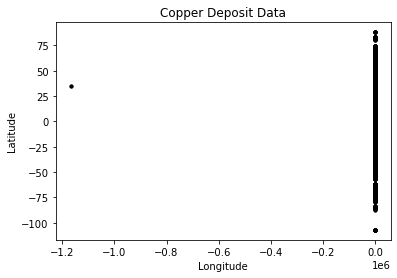

In [28]:
#Plot the lats and lons, i.e. the first column vs the second column
plt.plot(chemdata[:,1], chemdata[:,0], 'k.')
plt.title('Copper Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

This does not look right... It is a messy dataset! This is not uncommon. 
Maybe the Lats/Lons are stored as Norhtings/Eastings for some samples. 
Maybe they are missing a decimal place.

Anyway, Python is a great tool to clean things up! Let's investigate further.

In [29]:
#Clean up the data, remove anything outside lat lon extent

cudata = chemdata.copy()
cudata = cudata[cudata[:,1] > -180]
cudata = cudata[cudata[:,1] < 180]
cudata = cudata[cudata[:,0] > -90]
cudata = cudata[cudata[:,0] < 90]

print(chemdata.shape, cudata.shape)
print("We have removed", chemdata.shape[0]-cudata.shape[0], "samples")

(207431, 4) (207384, 4)
We have removed 47 samples


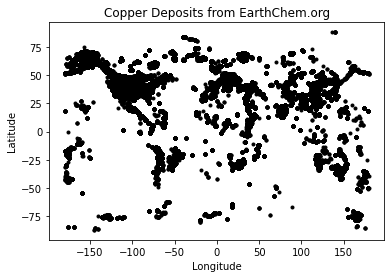

In [30]:
plt.plot(cudata[:,1],cudata[:,0],'k.')
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

We visualise the copper concentrations using the "copper" colour map from `matplotlib`. There are plenty of other inbuilt [colour maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to choose from!

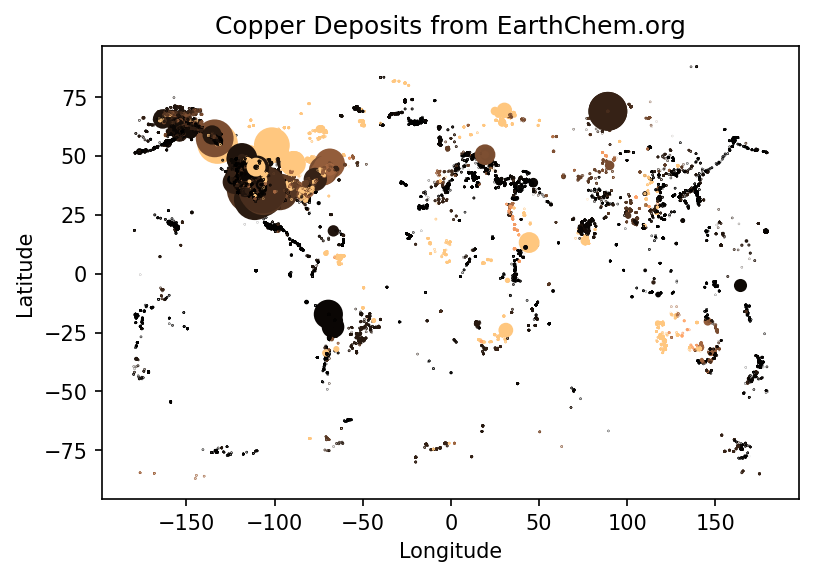

In [31]:
lats=cudata[:,0]
lons=cudata[:,1]
age=cudata[:,3]
copper=cudata[:,2]

#lats_rich=lats[copper>2]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(lons, lats, s=age/1000,c=copper, vmin=0, vmax=1000, cmap="copper")
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

## Mapping

We use `cartopy` - check out the huge list of [map projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) to choose from!

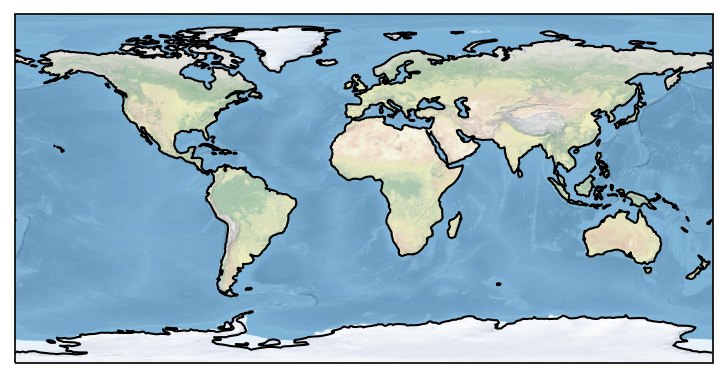

In [32]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(6,4), dpi=150)
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax1.set_global()
ax1.stock_img()
ax1.coastlines()

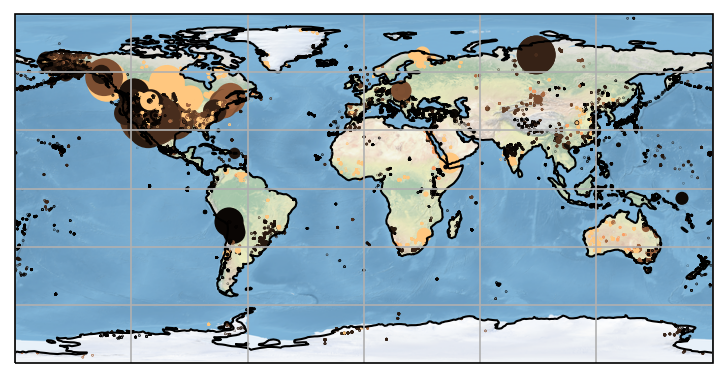

In [33]:
fig = plt.figure(figsize=(6,4), dpi=150)
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax1.set_global()
ax1.stock_img()
ax1.scatter(lons, lats, s=age/1000,c=copper,vmin=0, vmax=1000, cmap='copper', transform=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines()

In [34]:
## Exercise - try changing the projection type to something else.
## there's a whole bunch to try out that are built into Cartopy